In [3]:
import sys
# need to modify (for iteration file)
## sys.path
sys.path.append('c:/Users/User/Desktop/BG/ppg_device')

%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from utils_ogtt.data_extractor import DataExtractor
from utils_ogtt.visualization import Visualizer

In [7]:
params = {
    # ====================== Paths ===========================
    'data_path': 'C:/Users/User/Desktop/BG/ppg_device/data/ogtt',
    # a folder for storing the cached files
    'cache_path': 'C:/Users/User/Desktop/BG/ppg_device/data/ogtt_cache',

    # ====================== Hardware params ===========================
    'slots': {
        'c': 'green',
        'd': 'red',
        'e': 'infrared',
    },

    'fs': 500,
    
    # ====================== Study params ===========================
    # the subject ID to be included in the study
    'subject_id': [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'subjects_exam': [],

    # segment duration in seconds
    'segment_duration': 40,

    # filtering frequencies
    'bandpass': (0.5, 6),
    # 'notch': 50.0,

    'sqi_thresh': 85,
    # 'run_name': 'first_trial',
    # 'experiment_name': 'donut',
    'features': [
        'c_Tpi_median',
        'c_Tpp_median',
        'c_Tsys_median',
        'c_Tdia_median',
        'c_Tsp_median',
        'c_Tdp_median',
        'c_deltaT_median',
        'c_Tsw10_median',
        'c_Tsw25_median',
        'c_Tsw33_median',
        'c_Tsw50_median',
        'c_Tsw66_median',
        'c_Tsw75_median',
        'c_Tsw90_median',
        'c_Tdw10_median',
        'c_Tdw25_median',
        'c_Tdw33_median',
        'c_Tdw50_median',
        'c_Tdw66_median',
        'c_Tdw75_median',
        'c_Tdw90_median',
        'c_Tpw10_median',
        'c_Tpw25_median',
        'c_Tpw33_median',
        'c_Tpw50_median',
        'c_Tpw66_median',
        'c_Tpw75_median',
        'c_Tpw90_median',
        'c_Asp_median',
        'c_Adn_median',
        'c_Adp_median',
        'c_Aoff_median',
        'c_AUCpi_median',
        'c_AUCsys_median',
        'c_AUCdia_median',
        'c_IPR_median',
        'c_Tsys/Tdia_median',
        'c_Tpw25/Tpi_median',
        'c_Tpw50/Tpi_median',
        'c_Tpw75/Tpi_median',
        'c_Tpw25/Tsp_median',
        'c_Tpw50/Tsp_median',
        'c_Tpw75/Tsp_median',
        'c_Tdw10/Tsw10_median',
        'c_Tdw25/Tsw25_median',
        'c_Tdw33/Tsw33_median',
        'c_Tdw50/Tsw50_median',
        'c_Tdw66/Tsw66_median',
        'c_Tdw75/Tsw75_median',
        'c_Tdw90/Tsw90_median',
        'c_Tsp/Tpi_median',
        'c_Asp/Aoff_median',
        'c_Adp/Asp_median',
        'c_IPA_median',
        'c_Tsp/Asp_median',
        'c_Asp/deltaT_median',
        'c_Asp/(Tpi-Tsp)_median',
        'c_Tu_median',
        'c_Tv_median',
        'c_Tw_median',
        'c_Ta_median',
        'c_Tb_median',
        'c_Tc_median',
        'c_Td_median',
        'c_Te_median',
        'c_Tf_median',
        'c_Tb-c_median',
        'c_Tb-d_median',
        'c_Tp1_median',
        'c_Tp2_median',
        'c_Tp1-dp_median',
        'c_Tp2-dp_median',
        'c_Tu/Tpi_median',
        'c_Tv/Tpi_median',
        'c_Tw/Tpi_median',
        'c_Ta/Tpi_median',
        'c_Tb/Tpi_median',
        'c_Tc/Tpi_median',
        'c_Td/Tpi_median',
        'c_Te/Tpi_median',
        'c_Tf/Tpi_median',
        'c_(Tu-Ta)/Tpi_median',
        'c_(Tv-Tb)/Tpi_median',
        'c_Au/Asp_median',
        'c_Av/Au_median',
        'c_Aw/Au_median',
        'c_Ab/Aa_median',
        'c_Ac/Aa_median',
        'c_Ad/Aa_median',
        'c_Ae/Aa_median',
        'c_Af/Aa_median',
        'c_Ap2/Ap1_median',
        'c_(Ac-Ab)/Aa_median',
        'c_(Ad-Ab)/Aa_median',
        'c_AGI_median',
        'c_AGImod_median',
        'c_AGIinf_median',
        'c_AI_median',
        'c_RIp1_median',
        'c_RIp2_median',
        'c_SC_median',
        'c_IPAD_median',
        'd_Tpi_median',
        'd_Tpp_median',
        'd_Tsys_median',
        'd_Tdia_median',
        'd_Tsp_median',
        'd_Tdp_median',
        'd_deltaT_median',
        'd_Tsw10_median',
        'd_Tsw25_median',
        'd_Tsw33_median',
        'd_Tsw50_median',
        'd_Tsw66_median',
        'd_Tsw75_median',
        'd_Tsw90_median',
        'd_Tdw10_median',
        'd_Tdw25_median',
        'd_Tdw33_median',
        'd_Tdw50_median',
        'd_Tdw66_median',
        'd_Tdw75_median',
        'd_Tdw90_median',
        'd_Tpw10_median',
        'd_Tpw25_median',
        'd_Tpw33_median',
        'd_Tpw50_median',
        'd_Tpw66_median',
        'd_Tpw75_median',
        'd_Tpw90_median',
        'd_Asp_median',
        'd_Adn_median',
        'd_Adp_median',
        'd_Aoff_median',
        'd_AUCpi_median',
        'd_AUCsys_median',
        'd_AUCdia_median',
        'd_IPR_median',
        'd_Tsys/Tdia_median',
        'd_Tpw25/Tpi_median',
        'd_Tpw50/Tpi_median',
        'd_Tpw75/Tpi_median',
        'd_Tpw25/Tsp_median',
        'd_Tpw50/Tsp_median',
        'd_Tpw75/Tsp_median',
        'd_Tdw10/Tsw10_median',
        'd_Tdw25/Tsw25_median',
        'd_Tdw33/Tsw33_median',
        'd_Tdw50/Tsw50_median',
        'd_Tdw66/Tsw66_median',
        'd_Tdw75/Tsw75_median',
        'd_Tdw90/Tsw90_median',
        'd_Tsp/Tpi_median',
        'd_Asp/Aoff_median',
        'd_Adp/Asp_median',
        'd_IPA_median',
        'd_Tsp/Asp_median',
        'd_Asp/deltaT_median',
        'd_Asp/(Tpi-Tsp)_median',
        'd_Tu_median',
        'd_Tv_median',
        'd_Tw_median',
        'd_Ta_median',
        'd_Tb_median',
        'd_Tc_median',
        'd_Td_median',
        'd_Te_median',
        'd_Tf_median',
        'd_Tb-c_median',
        'd_Tb-d_median',
        'd_Tp1_median',
        'd_Tp2_median',
        'd_Tp1-dp_median',
        'd_Tp2-dp_median',
        'd_Tu/Tpi_median',
        'd_Tv/Tpi_median',
        'd_Tw/Tpi_median',
        'd_Ta/Tpi_median',
        'd_Tb/Tpi_median',
        'd_Tc/Tpi_median',
        'd_Td/Tpi_median',
        'd_Te/Tpi_median',
        'd_Tf/Tpi_median',
        'd_(Tu-Ta)/Tpi_median',
        'd_(Tv-Tb)/Tpi_median',
        'd_Au/Asp_median',
        'd_Av/Au_median',
        'd_Aw/Au_median',
        'd_Ab/Aa_median',
        'd_Ac/Aa_median',
        'd_Ad/Aa_median',
        'd_Ae/Aa_median',
        'd_Af/Aa_median',
        'd_Ap2/Ap1_median',
        'd_(Ac-Ab)/Aa_median',
        'd_(Ad-Ab)/Aa_median',
        'd_AGI_median',
        'd_AGImod_median',
        'd_AGIinf_median',
        'd_AI_median',
        'd_RIp1_median',
        'd_RIp2_median',
        'd_SC_median',
        'd_IPAD_median',
        'e_Tpi_median',
        'e_Tpp_median',
        'e_Tsys_median',
        'e_Tdia_median',
        'e_Tsp_median',
        'e_Tdp_median',
        'e_deltaT_median',
        'e_Tsw10_median',
        'e_Tsw25_median',
        'e_Tsw33_median',
        'e_Tsw50_median',
        'e_Tsw66_median',
        'e_Tsw75_median',
        'e_Tsw90_median',
        'e_Tdw10_median',
        'e_Tdw25_median',
        'e_Tdw33_median',
        'e_Tdw50_median',
        'e_Tdw66_median',
        'e_Tdw75_median',
        'e_Tdw90_median',
        'e_Tpw10_median',
        'e_Tpw25_median',
        'e_Tpw33_median',
        'e_Tpw50_median',
        'e_Tpw66_median',
        'e_Tpw75_median',
        'e_Tpw90_median',
        'e_Asp_median',
        'e_Adn_median',
        'e_Adp_median',
        'e_Aoff_median',
        'e_AUCpi_median',
        'e_AUCsys_median',
        'e_AUCdia_median',
        'e_IPR_median',
        'e_Tsys/Tdia_median',
        'e_Tpw25/Tpi_median',
        'e_Tpw50/Tpi_median',
        'e_Tpw75/Tpi_median',
        'e_Tpw25/Tsp_median',
        'e_Tpw50/Tsp_median',
        'e_Tpw75/Tsp_median',
        'e_Tdw10/Tsw10_median',
        'e_Tdw25/Tsw25_median',
        'e_Tdw33/Tsw33_median',
        'e_Tdw50/Tsw50_median',
        'e_Tdw66/Tsw66_median',
        'e_Tdw75/Tsw75_median',
        'e_Tdw90/Tsw90_median',
        'e_Tsp/Tpi_median',
        'e_Asp/Aoff_median',
        'e_Adp/Asp_median',
        'e_IPA_median',
        'e_Tsp/Asp_median',
        'e_Asp/deltaT_median',
        'e_Asp/(Tpi-Tsp)_median',
        'e_Tu_median',
        'e_Tv_median',
        'e_Tw_median',
        'e_Ta_median',
        'e_Tb_median',
        'e_Tc_median',
        'e_Td_median',
        'e_Te_median',
        'e_Tf_median',
        'e_Tb-c_median',
        'e_Tb-d_median',
        'e_Tp1_median',
        'e_Tp2_median',
        'e_Tp1-dp_median',
        'e_Tp2-dp_median',
        'e_Tu/Tpi_median',
        'e_Tv/Tpi_median',
        'e_Tw/Tpi_median',
        'e_Ta/Tpi_median',
        'e_Tb/Tpi_median',
        'e_Tc/Tpi_median',
        'e_Td/Tpi_median',
        'e_Te/Tpi_median',
        'e_Tf/Tpi_median',
        'e_(Tu-Ta)/Tpi_median',
        'e_(Tv-Tb)/Tpi_median',
        'e_Au/Asp_median',
        'e_Av/Au_median',
        'e_Aw/Au_median',
        'e_Ab/Aa_median',
        'e_Ac/Aa_median',
        'e_Ad/Aa_median',
        'e_Ae/Aa_median',
        'e_Af/Aa_median',
        'e_Ap2/Ap1_median',
        'e_(Ac-Ab)/Aa_median',
        'e_(Ad-Ab)/Aa_median',
        'e_AGI_median',
        'e_AGImod_median',
        'e_AGIinf_median',
        'e_AI_median',
        'e_RIp1_median',
        'e_RIp2_median',
        'e_SC_median',
        'e_IPAD_median',
        'heart_rate',
        'gender'
    ],
}

In [8]:
data_extractor = DataExtractor(params=params)
# Attributes
# -----------------
# fs : int
#     the sampling frequency of the PPG signals
# params : dict
#     a dictionary of parameters for data extraction
# attr_path : str
#     the path to the attribute file
# ppg_path : str
#     the path to the PPG files
# df_attr : pd.DataFrame
#     a data frame of the attributes
# df_attr_seg : pd.DataFrame
#     a data frame of the segmented attributes
data_extractor.operate()

[Segmentation] Processing df_attr records 1/20
[Segmentation] Processing df_attr records 2/20
[Segmentation] Processing df_attr records 3/20
[Segmentation] Processing df_attr records 4/20
[Segmentation] Processing df_attr records 5/20
[Segmentation] Processing df_attr records 6/20
[Segmentation] Processing df_attr records 7/20
[Segmentation] Processing df_attr records 8/20
[Segmentation] Processing df_attr records 9/20
[Segmentation] Processing df_attr records 10/20
[Segmentation] Processing df_attr records 11/20
[Segmentation] Processing df_attr records 12/20
[Segmentation] Processing df_attr records 13/20
[Segmentation] Processing df_attr records 14/20
[Segmentation] Processing df_attr records 15/20
[Segmentation] Processing df_attr records 16/20
[Segmentation] Processing df_attr records 17/20
[Segmentation] Processing df_attr records 18/20
[Segmentation] Processing df_attr records 19/20
[Segmentation] Processing df_attr records 20/20
[Filtering] Processing df_attr_seg records 1/443


c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

no more peaks
no more peaks
no more peaks
no more peaks


c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

no more peaks
no more peaks
no more peaks
no more peaks
[Feature generation] Processing df_attr_seg records 2/411


c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df_attr_seg.loc[idx, feature_name] = feature_val
c:\Users/User/Desktop/BG/ppg_device\utils_ogtt\data_extractor.py:580: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
[Feature generation] Processing df_attr_seg records 3/411
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
[Feature generation] Processing df_attr_seg records 4/411
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
[Feature generation] Processing df_attr_seg records 5/411
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
[Feature generation] Processing df_attr_seg records 6/411
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peaks
no more peak

In [9]:
data_extractor.df_attr

,subject_id,name,record_date,gender,age,height,weight,last_meal_time,ethnicity,diabetes,smoking,alcohol,heart_rate_before,blood_glucose_before,ppg_file_before,heart_rate_after,blood_glucose_after,ppg_file_after,notes
0,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,a,a,77.0,5.3,240103_1010AM_01032777,68.0,8.2,240103_1102AM_01032B0D,NaN
1,2.0,Emerald,20240104.0,F,23.0,170.0,66.00,16.0,east_asian,no,a,b,89.0,5.1,240104_1110AM_01042B5D,82.0,9.3,240104_1207PM_01042F29,NaN
2,3.0,Liangyi,20240105.0,M,25.0,183.0,72.00,9.0,east_asian,no,a,a,65.0,5.9,240105_1002AM_01052725,65.0,9.2,240105_1105AM_01052B2A,"blood_glucose_after: 9.2, 7.4"
3,4.0,Jin Yanwei,20240108.0,F,24.0,165.0,50.00,10.0,east_asian,no,a,a,77.0,5.2,240108_1008AM_01082763,67.0,10.4,240108_1103AM_01082B18,"blood_glucose_before: 5.2, 4.8\nblood_glucose_..."
4,6.0,Hanjie,20240111.0,M,29.0,182.0,86.50,16.0,east_asian,no,a,a,75.0,5.4,240111_0959AM_01112577,65.0,9.5,240111_1047AM_011128E7,NaN
5,7.0,Lingfeng,20240112.0,M,29.0,170.0,61.00,14.0,east_asian,no,a,a,67.0,5.0,240112_0950AM_0112251E,67.0,8.5,240112_1044AM_011228CA,NaN
6,8.0,Wenguo,20240116.0,M,27.0,170.0,54.00,11.0,east_asian,no,a,a,80.0,5.9,240116_1105AM_01162B2E,70.0,10.8,240116_1152AM_01162D04,"blood_glucose_ before: 6.4, 5.9"
7,9.0,Zheng,20240118.0,M,28.0,176.0,63.00,17.0,east_asian,no,a,a,82.0,5.1,240118_1215PM_01182F7A,82.0,9.5,240118_0117PM_01183375,NaN
8,10.0,Yin King,20240119.0,M,23.0,185.0,65.00,13.0,east_asian,no,a,a,68.0,5.1,240119_0952AM_01192531,59.0,9.5,240119_1056AM_01192941,"blood_glucose_ before: 4.3, 5.1"
9,11.0,Eddie,20240226.0,M,33.0,181.0,75.00,13.0,east_asian,no,a,b,63.0,5.0,240226_0939AM_022624B0,61.0,7.8,240226_1035AM_02262871,"blood_glucose_ after: 7.8, 7.7"


In [10]:
data_extractor.df_attr_seg

,subject_id,name,record_date,gender,age,height,weight,last_meal_time,ethnicity,diabetes,...,e_(Ac-Ab)/Aa_median,e_(Ad-Ab)/Aa_median,e_AGI_median,e_AGImod_median,e_AGIinf_median,e_AI_median,e_RIp1_median,e_RIp2_median,e_SC_median,e_IPAD_median
0,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,...,0.871176,0.866121,-1.168954,-0.811289,-1.281519,-0.272657,1.962024,1.962024,-0.950608,1.265129
1,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,...,0.898749,0.898749,-1.212468,-0.855236,-1.298891,-0.300305,1.898753,1.898753,-1.120795,0.313472
2,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,...,0.899696,0.899696,-1.199223,-0.868138,-1.232783,-0.302838,1.996277,1.996277,-1.161415,1.382082
3,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,...,0.910834,0.910834,-1.208963,-0.887206,-1.271335,-0.300372,1.975929,1.975929,-1.210912,1.080777
4,1.0,Lester,20240103.0,M,28.0,175.0,68.00,9.0,east_asian,no,...,0.897332,0.897332,-1.188330,-0.852108,-1.270426,-0.293311,1.909484,1.909484,-1.215413,1.342902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21.0,NaN,20240530.0,M,30.0,167.1,66.55,13.0,east_asian,no,...,0.838680,0.764838,-0.973124,-0.775363,-1.010707,-0.184915,2.523410,2.523410,-0.220005,1.072862
407,21.0,NaN,20240530.0,M,30.0,167.1,66.55,13.0,east_asian,no,...,0.838680,0.764838,-0.973124,-0.775363,-1.010707,-0.184915,2.523410,2.523410,-0.220005,1.072862
408,21.0,NaN,20240530.0,M,30.0,167.1,66.55,13.0,east_asian,no,...,0.838680,0.764838,-0.973124,-0.775363,-1.010707,-0.184915,2.523410,2.523410,-0.220005,1.072862
409,21.0,NaN,20240530.0,M,30.0,167.1,66.55,13.0,east_asian,no,...,0.838680,0.764838,-0.973124,-0.775363,-1.010707,-0.184915,2.523410,2.523410,-0.220005,1.072862


In [11]:
# example ppg_segment_id
ppg_segment_id = str(data_extractor.df_attr_seg.loc[3, 'ppg_segment_id'])

In [12]:
ppg_segment_id

'd549ae00-d42e-490c-8339-ee510a7af845'

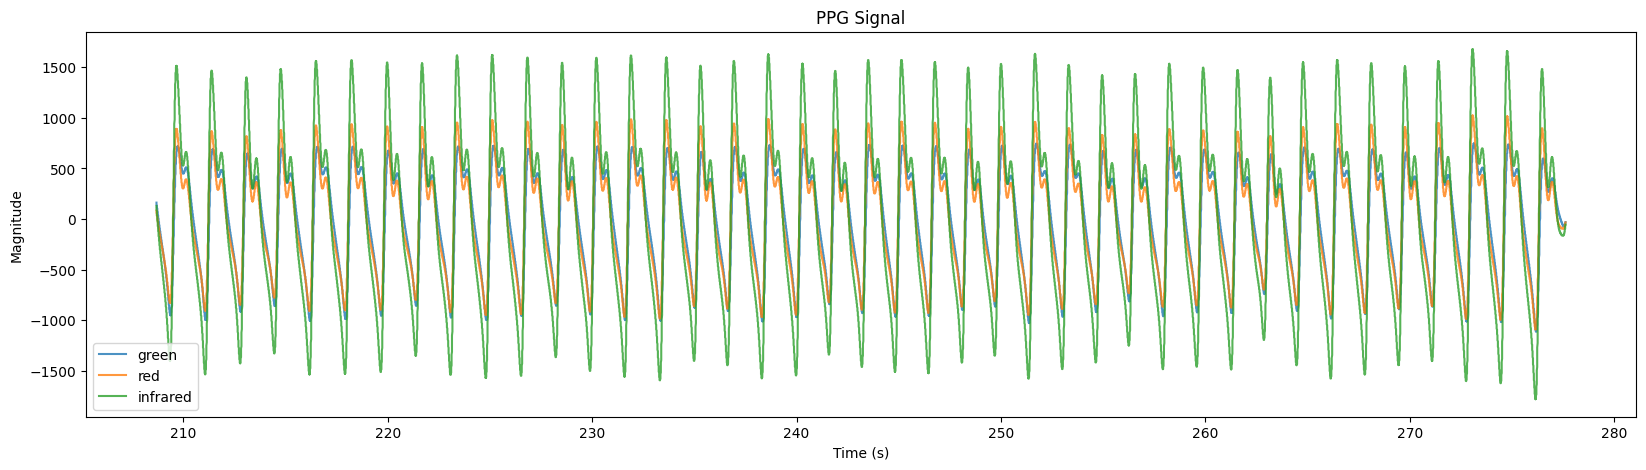

In [13]:
visualizer = Visualizer(params=params, df_attr_seg=data_extractor.df_attr_seg)
fig = visualizer.plot_ppg(ppg_segment_id)

({'c': 97.58, 'd': 97.03, 'e': 97.03},
 {'c': <Figure size 2000x600 with 4 Axes>,
  'd': <Figure size 2000x600 with 4 Axes>,
  'e': <Figure size 2000x600 with 4 Axes>})

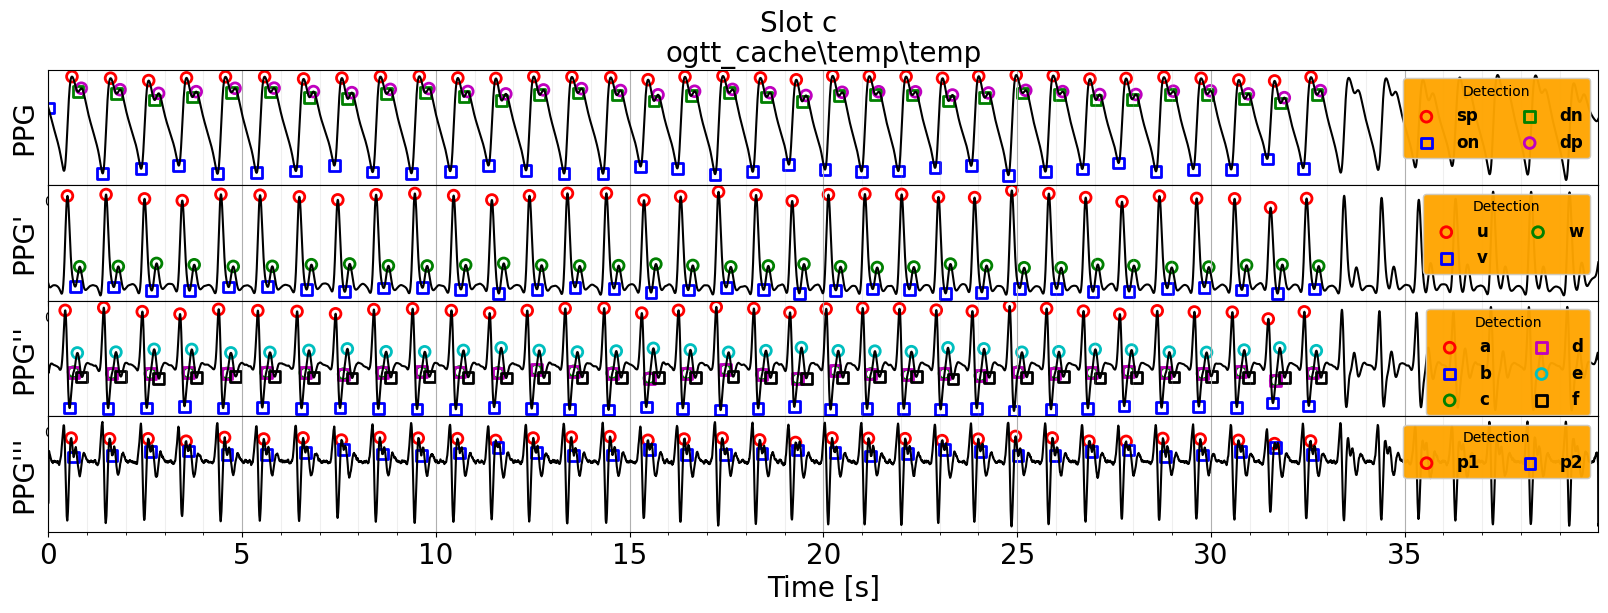

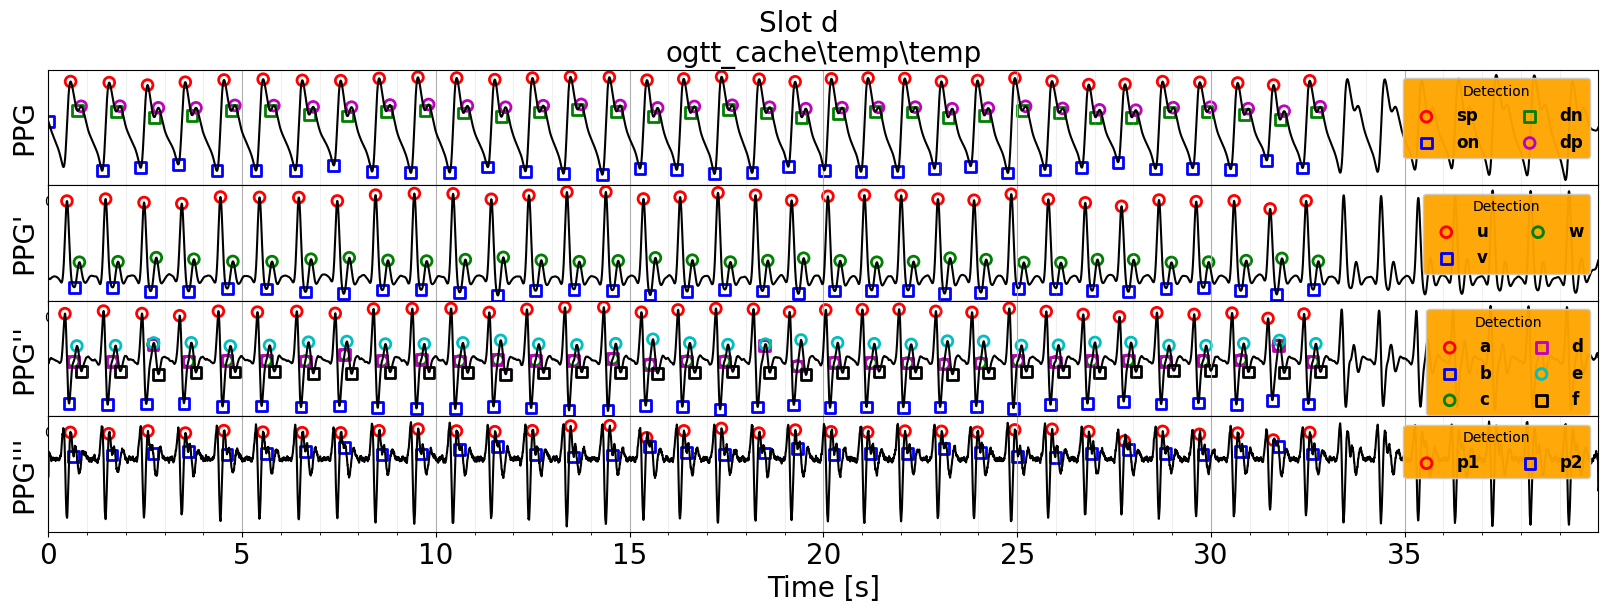

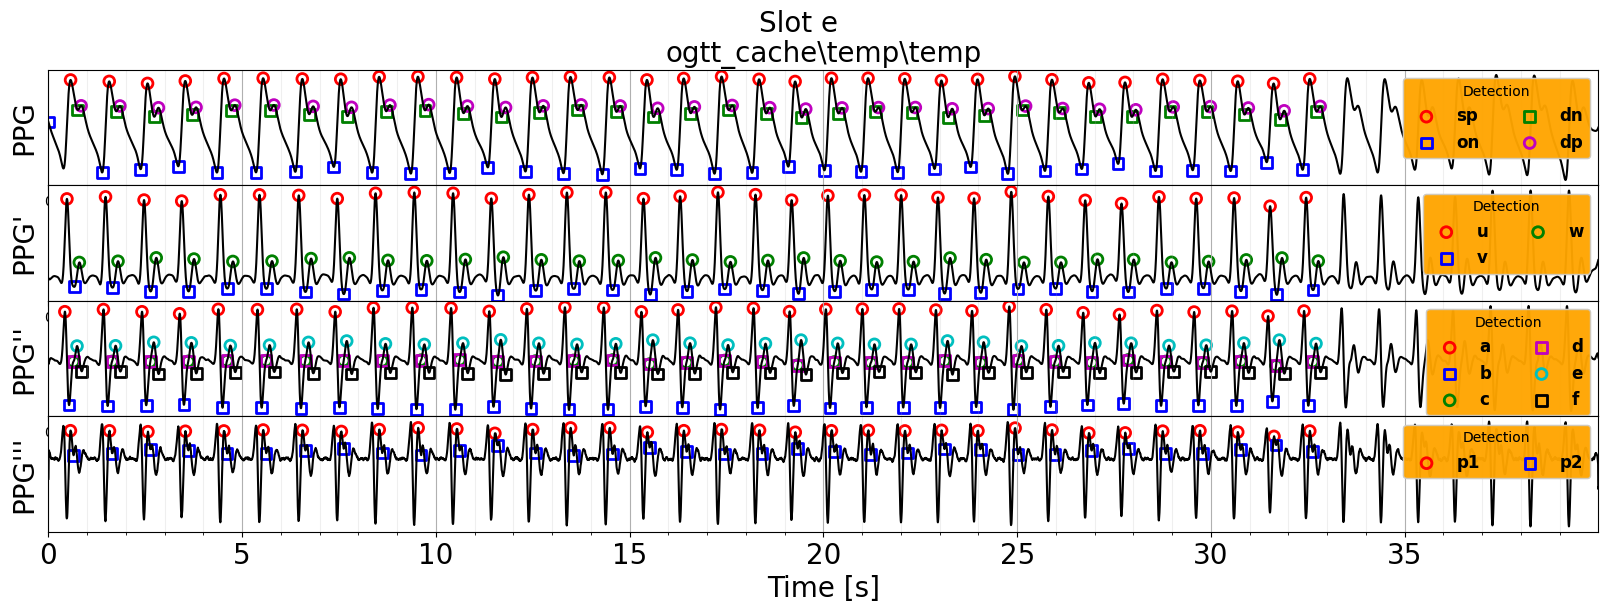

In [14]:
data_extractor.get_single_segment_quality(ppg_segment_id, params['cache_path'], params['fs'], plot=True)

In [15]:
# need to comfirm data
# convert blood glucose to 3 levels (consider 1 inaccuracies)
y = np.zeros(len(data_extractor.df_attr_seg['blood_glucose']))
for i,n in enumerate(data_extractor.df_attr_seg['blood_glucose']):
    if n < 6.2:
        y[i] = 0 #normal
    else:
        y[i] = 1

In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [17]:
# X = data_extractor.df_attr_seg.loc[:, data_extractor.df_attr_seg.columns != 'blood_glucose']
# X.drop(X.columns[[0,1,2,12,15,16]], axis = 1, inplace = True)
X = data_extractor.df_attr_seg[params['features']]
X['gender']= label_encoder.fit_transform(X['gender']) 
X.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17224\2570937493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender']= label_encoder.fit_transform(X['gender'])


,c_Tpi_median,c_Tpp_median,c_Tsys_median,c_Tdia_median,c_Tsp_median,c_Tdp_median,c_deltaT_median,c_Tsw10_median,c_Tsw25_median,c_Tsw33_median,...,e_AGI_median,e_AGImod_median,e_AGIinf_median,e_AI_median,e_RIp1_median,e_RIp2_median,e_SC_median,e_IPAD_median,heart_rate,gender
0,0.968,0.968,0.356,0.514,0.198,0.454,0.258,0.156,0.134,0.124,...,-1.168954,-0.811289,-1.281519,-0.272657,1.962024,1.962024,-0.950608,1.265129,77.0,1
1,0.947,0.945,0.356,0.499,0.200,0.449,0.250,0.158,0.136,0.126,...,-1.212468,-0.855236,-1.298891,-0.300305,1.898753,1.898753,-1.120795,0.313472,77.0,1
2,0.972,0.970,0.362,0.518,0.202,0.450,0.248,0.160,0.138,0.128,...,-1.199223,-0.868138,-1.232783,-0.302838,1.996277,1.996277,-1.161415,1.382082,77.0,1
3,0.970,0.972,0.360,0.520,0.202,0.450,0.248,0.160,0.136,0.126,...,-1.208963,-0.887206,-1.271335,-0.300372,1.975929,1.975929,-1.210912,1.080777,77.0,1
4,0.952,0.952,0.358,0.504,0.201,0.447,0.248,0.160,0.136,0.126,...,-1.188330,-0.852108,-1.270426,-0.293311,1.909484,1.909484,-1.215413,1.342902,77.0,1


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [19]:
print(x_train, y_train)

     c_Tpi_median  c_Tpp_median  c_Tsys_median  c_Tdia_median  c_Tsp_median  \
389         1.061         1.044          0.425          0.566         0.355   
145         1.068         1.068          0.396          0.644         0.276   
351         0.952         0.954          0.412          0.512         0.284   
338         0.790         0.790          0.362          0.372         0.178   
109         0.896         0.892          0.392          0.454         0.216   
..            ...           ...            ...            ...           ...   
71          0.940         0.938          0.426          0.470         0.252   
106         0.974         0.972          0.390          0.538         0.230   
270         0.969         0.973          0.378          0.550         0.221   
348         0.847         0.852          0.408          0.418         0.267   
102         0.890         0.889          0.392          0.458         0.226   

     c_Tdp_median  c_deltaT_median  c_Tsw10_median 

### RNN

In [22]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [23]:
data_extractor.df_attr_seg.columns

Index(['subject_id', 'name', 'record_date', 'gender', 'age', 'height',
       'weight', 'last_meal_time', 'ethnicity', 'diabetes',
       ...
       'e_(Ac-Ab)/Aa_median', 'e_(Ad-Ab)/Aa_median', 'e_AGI_median',
       'e_AGImod_median', 'e_AGIinf_median', 'e_AI_median', 'e_RIp1_median',
       'e_RIp2_median', 'e_SC_median', 'e_IPAD_median'],
      dtype='object', length=328)

In [24]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [42]:
# batch_size, epoch and iteration
batch_size = 32
num_epochs = 200

# Pytorch train and test sets
train = TensorDataset(torch.tensor(x_train.values), torch.from_numpy(y_train.astype(int)))
test = TensorDataset(torch.tensor(x_test.values), torch.from_numpy(y_test.astype(int)))

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
seq_dim = 28   # same as input dimension
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data[0], accuracy))

RuntimeError: shape '[-1, 28, 28]' is invalid for input of size 9856

### SVM

In [54]:
from sklearn import svm, metrics
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,precision_score,accuracy_score, confusion_matrix
kf = KFold(n_splits=4, shuffle=False)
clf_svm = svm.SVC(kernel='linear', C=1, random_state=3)
for i, (train_index, test_index) in enumerate(kf.split(x_train)):
    print("==================== FOLD", i, "=======================")
    svm_model = clf_svm.fit(x_train.iloc[train_index,], y_train[train_index])
    y_pred = svm_model.predict(x_train.iloc[test_index,])
    print("F1-Score:",f1_score(y_train[test_index], y_pred))
    print("Precision:", precision_score(y_train[test_index], y_pred, average='weighted'))
    print("Accuracy", accuracy_score(y_train[test_index], y_pred))
    print("Confusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_train[test_index], y_pred)
    print(confusion_matrix)


==================== FOLD 0 =======================
F1-Score: 0.7341772151898734
Precision: 0.7113095238095237
Accuracy 0.7083333333333334
Confusion Matrix:
[[22 13]
 [ 8 29]]
==================== FOLD 1 =======================
F1-Score: 0.6987951807228915
Precision: 0.7289137877373171
Accuracy 0.6527777777777778
Confusion Matrix:
[[18 22]
 [ 3 29]]
==================== FOLD 2 =======================
F1-Score: 0.7857142857142856
Precision: 0.75
Accuracy 0.75
Confusion Matrix:
[[21 11]
 [ 7 33]]
==================== FOLD 3 =======================
F1-Score: 0.6835443037974683
Precision: 0.6599229718533779
Accuracy 0.647887323943662
Confusion Matrix:
[[19 10]
 [15 27]]


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0, max_leaf_nodes=300)
for i, (train_index, test_index) in enumerate(kf.split(x_train)):
    print("==================== FOLD", i, "=======================")
    clf_dt.fit(x_train.iloc[train_index,], y_train[train_index])
    y_pred = clf_dt.predict(x_train.iloc[test_index,])
    print("F1-Score:",f1_score(y_train[test_index], y_pred))
    print("Precision:", precision_score(y_train[test_index], y_pred, average='weighted'))
    print("Accuracy", accuracy_score(y_train[test_index], y_pred))
    print("Confusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_train[test_index], y_pred)
    print(confusion_matrix)

==================== FOLD 0 =======================
F1-Score: 0.9135802469135803
Precision: 0.9182449494949494
Accuracy 0.9027777777777778
Confusion Matrix:
[[28  7]
 [ 0 37]]
==================== FOLD 1 =======================
F1-Score: 0.8311688311688311
Precision: 0.871604938271605
Accuracy 0.8194444444444444
Confusion Matrix:
[[27 13]
 [ 0 32]]
==================== FOLD 2 =======================
F1-Score: 0.9523809523809523
Precision: 0.9494949494949494
Accuracy 0.9444444444444444
Confusion Matrix:
[[28  4]
 [ 0 40]]
==================== FOLD 3 =======================
F1-Score: 0.923076923076923
Precision: 0.9154929577464789
Accuracy 0.9014084507042254
Confusion Matrix:
[[22  7]
 [ 0 42]]


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(penalty='l1',solver = "liblinear")
for i, (train_index, test_index) in enumerate(kf.split(x_train)):
    print("==================== FOLD", i, "=======================")
    clf_LR.fit(x_train.iloc[train_index,], y_train[train_index])
    y_pred = clf_LR.predict(x_train.iloc[test_index,])
    print("F1-Score:",f1_score(y_train[test_index], y_pred))
    print("Precision:", precision_score(y_train[test_index], y_pred, average='weighted'))
    print("Accuracy", accuracy_score(y_train[test_index], y_pred))
    print("Confusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_train[test_index], y_pred)
    print(confusion_matrix)

==================== FOLD 0 =======================


c:\Users\User\anaconda3\envs\donut\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-Score: 0.9249999999999999
Precision: 0.9282945736434107
Accuracy 0.9166666666666666
Confusion Matrix:
[[29  6]
 [ 0 37]]
==================== FOLD 1 =======================


c:\Users\User\anaconda3\envs\donut\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-Score: 0.8
Precision: 0.8518518518518517
Accuracy 0.7777777777777778
Confusion Matrix:
[[24 16]
 [ 0 32]]
==================== FOLD 2 =======================


c:\Users\User\anaconda3\envs\donut\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-Score: 0.8470588235294118
Precision: 0.823045267489712
Accuracy 0.8194444444444444
Confusion Matrix:
[[23  9]
 [ 4 36]]
==================== FOLD 3 =======================
F1-Score: 0.9069767441860465
Precision: 0.8873950775359226
Accuracy 0.8873239436619719
Confusion Matrix:
[[24  5]
 [ 3 39]]


c:\Users\User\anaconda3\envs\donut\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
for i, (train_index, test_index) in enumerate(kf.split(x_train)):
    print("==================== FOLD", i, "=======================")
    clf_gnb.fit(x_train.iloc[train_index,], y_train[train_index])
    y_pred = clf_gnb.predict(x_train.iloc[test_index,])
    print("F1-Score:",f1_score(y_train[test_index], y_pred))
    print("Precision:", precision_score(y_train[test_index], y_pred, average='weighted'))
    print("Accuracy", accuracy_score(y_train[test_index], y_pred))
    print("Confusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_train[test_index], y_pred)
    print(confusion_matrix)

==================== FOLD 0 =======================
F1-Score: 0.7142857142857142
Precision: 0.692581553237291
Accuracy 0.6111111111111112
Confusion Matrix:
[[ 9 26]
 [ 2 35]]
==================== FOLD 1 =======================
F1-Score: 0.5777777777777777
Precision: 0.5166940339354132
Accuracy 0.4722222222222222
Confusion Matrix:
[[ 8 32]
 [ 6 26]]
==================== FOLD 2 =======================
F1-Score: 0.7326732673267327
Precision: 0.6602086438152013
Accuracy 0.625
Confusion Matrix:
[[ 8 24]
 [ 3 37]]
==================== FOLD 3 =======================
F1-Score: 0.7391304347826089
Precision: 0.6551039570757881
Accuracy 0.6619718309859155
Confusion Matrix:
[[13 16]
 [ 8 34]]


### Test Data

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
principalTrain = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([7.77912396e-01, 1.61561036e-01, 4.56995487e-02, 8.97082872e-03,
       2.89225925e-03, 2.20672187e-03, 2.84960831e-04, 2.11127479e-04,
       1.16840679e-04, 7.27932507e-05, 2.88879690e-05, 1.84483171e-05,
       1.04106646e-05, 5.61887824e-06, 4.69257798e-06, 1.49400026e-06,
       7.49770219e-07, 5.11507936e-07, 3.00998073e-07, 1.73441270e-07,
       6.14499007e-08, 4.94106990e-08, 2.70401166e-08, 1.97318200e-08,
       1.15042659e-08, 5.42604107e-09, 4.08632131e-09, 3.20223270e-09,
       2.64383061e-09, 2.34026354e-09])

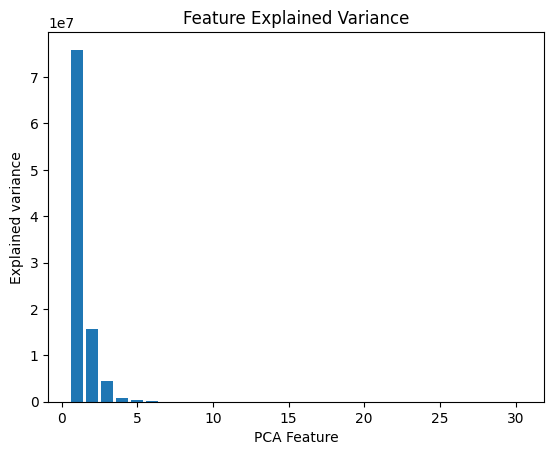

In [50]:
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [51]:
# Decision tree
clf_dt.fit(x_train, y_train)
y_pred = clf_dt.predict(x_test)
print("F1-Score:",f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

F1-Score: 0.911764705882353
Precision: 0.9189189189189189
Accuracy 0.9032258064516129
Confusion Matrix:
[[50 12]
 [ 0 62]]


In [58]:
# Logistics regression
clf_LR.fit(x_train, y_train)
y_pred = clf_LR.predict(x_test)
print("F1-Score:",f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

F1-Score: 0.911764705882353
Precision: 0.9189189189189189
Accuracy 0.9032258064516129
Confusion Matrix:
[[50 12]
 [ 0 62]]


c:\Users\User\anaconda3\envs\donut\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
# SVM
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print("F1-Score:",f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

F1-Score: 0.6614173228346457
Precision: 0.6535853976531942
Accuracy 0.6532258064516129
Confusion Matrix:
[[39 23]
 [20 42]]


In [60]:
# Navie bayes
clf_gnb.fit(x_train, y_train)
y_pred = clf_gnb.predict(x_test)
print("F1-Score:",f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

F1-Score: 0.6900584795321636
Precision: 0.6706422018348625
Accuracy 0.5725806451612904
Confusion Matrix:
[[12 50]
 [ 3 59]]


clf_dt(decision tree) run twice, remove one.<br>
Missing SVM and Naive Bayes models training on whole training dataset.
